# Testes básicos do funcionamento do CCScore

In [39]:
import sys
sys.path.append('../ccscore/')

import spacy
import pandas as pd
import pickle
from infernal import feature_extraction as fe
from infernal import datastructures as ds
import confapp as config
config.TEP2_PATH = "../ccscore/data/tep2.pickle"

import helper_palavras as h_pal 
from text_document import TextDocument
from matplotlib import pyplot as plt
import numpy as np

In [40]:
nlp = spacy.load('pt_core_news_lg')

In [41]:
PATH_CORPUS = "../ccscore/data/Corpus_Redacoes.pickle"

# Carrega a base de redações
df_redacao = pickle.load(open(PATH_CORPUS, 'rb'))
df_redacao

,Texto,Nota,Correção,Competência 1,Competência 2,Competência 3,Competência 4,Competência 5,Qtd palavras,Cadeias,Palavras,Erros,Entidades,Coesão Calculada
0,"Jornais, novelas e anúncios publicitários, a t...",700.0,"Jornais, novelas e anúncios publicitários, a t...",150.0,150.0,150.0,150.0,100.0,333,"{'Cadeia_1': {'sn': [OrderedDict([('@id', '2')...",\nJornais \t[jornal] <*> <sem-r> N M P @TOP #...,[[xml:118] Verificou-se erro de concordância e...,"{'TV': {'label': 16544881809274863474, 'kb_id'...",150.00
1,"Em Abril de 2011, um crime sem escrúpulos choc...",450.0,"Em abril de 2011, um crime sem escrúpulos choc...",100.0,100.0,50.0,100.0,100.0,328,"{'Cadeia_1': {'sn': [OrderedDict([('@id', '1')...",\nEm \t[em] <*> PRP @ADVL> #1->10\nAbril \t[a...,[[space:EXTRA_BEFORE_RIGHT_PUNCT] Excesso de e...,"{'Abril de 2011': {'label': 383, 'kb_id': '', ...",100.00
2,A proibição ou permissão de fumantes em locais...,800.0,A proibição ou permissão de fumantes em locais...,150.0,200.0,150.0,150.0,150.0,323,"{'Cadeia_5': {'sn': [OrderedDict([('@id', '6')...",\nA \t[o] <*> <artd> DET F S @>N #1->2\nproib...,[[space:EXTRA_BEFORE_RIGHT_PUNCT] Excesso de e...,"{'de São Paulo': {'label': 385, 'kb_id': 'Q175...",150.00
3,"Em Abril de 2011, um crime sem escrúpulos choc...",450.0,"Em abril de 2011, um crime sem escrúpulos choc...",100.0,100.0,50.0,100.0,100.0,328,"{'Cadeia_1': {'sn': [OrderedDict([('@id', '1')...",\nEm \t[em] <*> PRP @ADVL> #1->10\nAbril \t[a...,[[space:EXTRA_BEFORE_RIGHT_PUNCT] Excesso de e...,"{'Abril de 2011': {'label': 383, 'kb_id': '', ...",100.00
4,"Política, uma palavra que pode ter uma definiç...",500.0,"Política, uma palavra que pode ter uma definiç...",100.0,100.0,100.0,100.0,100.0,255,"{'Cadeia_10': {'sn': [OrderedDict([('@id', '10...",\nPolítica \t[político] <*> ADJ F S @PRED> #1...,[[space:EXTRA_BEFORE_RIGHT_PUNCT] Excesso de e...,"{'Política': {'label': 16544881809274863474, '...",100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,"O toque de recolher, à noite, imposto aos jove...",750.0,"O toque de recolher, à noite, imposto aos jove...",100.0,150.0,150.0,150.0,200.0,291,"{'Cadeia_0': {'sn': [OrderedDict([('@id', '0')...",\nO \t[o] <clb> <*> <artd> DET M S @>N #1->2\...,[[space:EXTRA_BEFORE_RIGHT_PUNCT] Excesso de e...,"{'anos': {'label': 16544881809274863474, 'kb_i...",70.71
2596,As manifestações populares podem contribuir pa...,750.0,As manifestações populares podem contribuir pa...,150.0,150.0,150.0,150.0,150.0,312,"{'Cadeia_0': {'sn': [OrderedDict([('@id', '0')...",\nAs \t[o] <*> <artd> DET F P @>N #1->2\nmani...,[[space:EXTRA_BEFORE_RIGHT_PUNCT] Excesso de e...,"{'Presidente': {'label': 7654241940133152407, ...",70.61
2597,Anualmente as universidades brasileiras concen...,650.0,Anualmente as universidades brasileiras concen...,150.0,150.0,100.0,150.0,100.0,265,"{'Cadeia_0': {'sn': [OrderedDict([('@id', '0')...",\nAnualmente \t[anualmente] <*> ADV @ADVL> #1...,[[probs:paronyms] Possível confusão entre divi...,"{'negros': {'label': 16544881809274863474, 'kb...",70.54
2598,"A cada período eleitoral, surgem campanhas de ...",750.0,"A cada período eleitoral, surgem campanhas de ...",150.0,150.0,150.0,150.0,150.0,345,"{'Cadeia_2': {'sn': [OrderedDict([('@id', '2')...",\nA \t[a] <*> PRP @ADVL> #1->6\ncada \t[cada]...,[[punctuation:BEFORE_SENTENCES] Pontuação no i...,"{'Constituição velha': {'label': 383, 'kb_id':...",70.51


In [42]:
num_redacao = 1915
texto = df_redacao['Texto'][num_redacao]
anot_pal = df_redacao['Palavras'][num_redacao]
nota_compt4 = df_redacao['Competência 4'][num_redacao]
erros = df_redacao['Erros'][num_redacao]
entidades = df_redacao['Entidades'][num_redacao]
cadeias = df_redacao['Cadeias'][num_redacao]

print(f"Num.: {num_redacao}\nCompetência 4: {nota_compt4}")

Num.: 1915
Competência 4: 150.0


In [79]:
entidades

{'séculos': {'label': 16544881809274863474,
  'kb_id': 'Q578',
  'candidates': ['século', 'Século', 'Século I', 'Século X']},
 'Cleópatra': {'label': 4317129024397789502,
  'kb_id': 'Q635',
  'candidates': ['Cleópatra VII', 'Cleópatra Berenice']},
 'Hatshepsut': {'label': 4317129024397789502, 'kb_id': '', 'candidates': []},
 'Egito': {'label': 385,
  'kb_id': 'Q79',
  'candidates': ['Libra do Egito', 'Antigo Egito']},
 'Brasil': {'label': 385,
  'kb_id': 'Q155',
  'candidates': ['GE Brasil', 'Rede Brasil', 'Arte do Brasil']},
 'brasileira': {'label': 16544881809274863474,
  'kb_id': 'Q873625',
  'candidates': ['A Brasileira', 'Brasileiras', 'Arte brasileira']},
 'Princesa Isabel': {'label': 4317129024397789502,
  'kb_id': 'Q464449',
  'candidates': ['Princesa Isabella', 'Princesa Isabel do Brasil']},
 'Lei Áurea': {'label': 7654241940133152407,
  'kb_id': 'Q1519167',
  'candidates': []},
 'Bertha Luz': {'label': 4317129024397789502, 'kb_id': '', 'candidates': []},
 'Federação Brasileir

In [43]:
tp = h_pal.parse_text_toclass(anot_pal, texto)
td = TextDocument(texto, tp)

In [44]:
print(texto)

Embora as pessoas acreditem que a mulher só obteve seu papel nos últimos séculos, há registros de mulheres que se destacaram na antiguidade clássica, como é o caso da Cleópatra e Hatshepsut (rainhas do Egito), mulheres espartanas e mulheres romanas, apesar dessas não terem uma vida política ativa. Houve progressos e retrocessos ao longo da história nesse âmbito. No entanto,  no Brasil, o que se vê é que as mulheres foram tardiamente e gradativamente conquistando seus direitos.
A partir de 1827, a mulher brasileira passou a ter brandos direitos, como permissão de estudar, e em 1888 destaca-se a ‘pioneira’ em ‘questões diplomáticas’, Princesa Isabel, que assinou a Lei Áurea, a qual aboliu a escravidão. Apesar de ela ter um papel fundamental na história do Brasil, demorou a outras mulheres se destacarem e, após muitas lutas, Bertha Luz, em 1922, cria a Federação Brasileira pelo Progresso Feminino, que foi o estopim para a conquista do voto feminino. A partir daí, a mulher começou a progre

In [45]:
print(anot_pal)


Embora 	[embora] <clb> <clb-fs> <*> KS @SUB  #1->4
as 	[o] <artd> DET F P @>N  #2->3
pessoas 	[pessoa] <H> N F P @SUBJ>  #3->4
acreditem 	[acreditar] <vH> <mv> V PR 3P SUBJ VFIN @FS-ADVL>  #4->17
que 	[que] <clb> <clb-fs> KS @SUB  #5->9
a 	[o] <artd> DET F S @>N  #6->7
mulher 	[mulher] <Hbio> <Hfam> <Hattr> N F S @SUBJ>  #7->9
só 	[só] <setop> ADV @ADVL>  #8->9
obteve 	[obter] <vH> <mv> V PS 3S IND VFIN @FS-<ACC  #9->4
seu 	[seu] <poss 3S> <si> DET M S @>N  #10->11
papel 	[papel] <mat> <cc-r> <ac> N M S @<ACC  #11->9
em 	[em] <sam-> PRP @<ADVL  #12->9
os 	[o] <artd> <-sam> DET M P @>N  #13->15
últimos 	[último] <NUM-ord> ADJ M P @>N  #14->15
séculos 	[século] <dur> <per> N M P @P<  #15->12
$, #16->0
há 	[haver] <fmc> <mv> V PR 3S IND VFIN @FS-STA  #17->0
registros 	[registro] <cc-r> N M P @<ACC  #18->17
de 	[de] <np-close> PRP @N<  #19->18
mulheres 	[mulher] <Hbio> <Hfam> <Hattr> N F P @P<  #20->19
que 	[que] <clb> <clb-fs> <rel> SPEC M S @SUBJ>  #21->23
se 	[se] <refl> PERS M 3P ACC 

In [46]:
td.sentences[0].dbpedia_mentions
#td.sentences


['antiguidade clássica', 'Cleópatra', 'Hatshepsut', 'Egito']

In [47]:
for t in td.sentences[3].palavras_sentence.tokens:
    print(f"Lemma: {t.lemma}, POS: {t.pos}, ref: {t.ref}, tags: {t.tags}")


Lemma: a=partir=de, POS: 1, ref: #1->9, tags: [('<*>', 'TEXT_METAINFO'), ('PRP', 'WORD_CLASS'), ('@ADVL>', 'SYNTATIC')]
Lemma: 1827, POS: 2, ref: #2->1, tags: [('<card>', 'WORD_SUBCLASS'), ('<date>', 'SEMANTIC'), ('<year>', 'UNKNOWN'), ('NUM', 'WORD_CLASS'), ('M/F', 'INFLEXION'), ('P', 'INFLEXION'), ('@P<', 'SYNTATIC')]
Lemma: o, POS: 3, ref: #4->5, tags: [('<artd>', 'WORD_SUBCLASS'), ('DET', 'WORD_CLASS'), ('F', 'INFLEXION'), ('S', 'INFLEXION'), ('@>N', 'SYNTATIC')]
Lemma: mulher, POS: 4, ref: #5->7, tags: [('<Hbio>', 'SEMANTIC'), ('<Hfam>', 'SEMANTIC'), ('<Hattr>', 'SEMANTIC'), ('N', 'WORD_CLASS'), ('F', 'INFLEXION'), ('S', 'INFLEXION'), ('@SUBJ>', 'SYNTATIC')]
Lemma: brasileiro, POS: 5, ref: #6->5, tags: [('<nat>', 'SEMANTIC'), ('<jh>', 'SEMANTIC'), ('<np-close>', 'UNKNOWN'), ('ADJ', 'WORD_CLASS'), ('F', 'INFLEXION'), ('S', 'INFLEXION'), ('@N<', 'SYNTATIC')]
Lemma: passar, POS: 6, ref: #7->0, tags: [('<cjt-head>', 'UNKNOWN'), ('<fmc>', 'WORD_SUBCLASS'), ('<aux>', 'UNKNOWN'), ('V', '

In [48]:
for erro in erros:
    print(f"{erro.rule_id} - {erro.short_msg}")
    

space:EXTRA_BETWEEN_WORDS - Excesso de espaços entre as palavras.
xml:124 - O adjetivo na função de predicativo concorda com o sujeito.


In [49]:
for word in td.sentences[3].annotated:
      print(f"{word.text} [{word.lemma_}] {word.pos_} {word.dep_}")

A [A] ADP case
partir [partir] NOUN fixed
de [de] ADP fixed
1827 [1827] NUM obl
, [,] PUNCT punct
a [o] DET det
mulher [mulher] NOUN nsubj
brasileira [brasileiro] ADJ amod
passou [passar] VERB ROOT
a [o] SCONJ mark
ter [ter] VERB xcomp
brandos [brando] ADJ amod
direitos [direito] NOUN obj
, [,] PUNCT punct
como [comer] ADP case
permissão [permissão] NOUN obl
de [de] SCONJ mark
estudar [estudar] VERB acl
, [,] PUNCT punct
e [e] CCONJ cc
em [em] ADP case
1888 [1888] NUM obl
destaca-se [destaca-se] VERB conj
a [o] DET det
‘ [‘] PUNCT punct
pioneira [pioneiro] ADJ amod
’ [’] PUNCT punct
em [em] ADP case
‘ [‘] PUNCT punct
questões [questão] NOUN obl
diplomáticas [diplomático] ADJ amod
’ [’] PUNCT punct
, [,] PUNCT punct
Princesa [Princesa] PROPN appos
Isabel [Isabel] PROPN flat:name
, [,] PUNCT punct
que [que] PRON nsubj
assinou [assinar] VERB acl:relcl
a [o] DET det
Lei [Lei] PROPN obj
Áurea [Áurea] PROPN flat:name
, [,] PUNCT punct
a [o] DET det
qual [qual] PRON nsubj
aboliu [abolir] VERB

In [50]:
len(td.sentences)

11

In [51]:
td.local_cohesion_values

[0.5, 0.0, 0.75, 0.5, 0.0, 0.0, 1.0, 0.75, 1.0, 0.5]

In [52]:
td.global_cohesion_values

[0.5, 0.75, 0.75, 0.5, 0.5, 1.0]

In [53]:
from itertools import tee

a,b = tee(list(range(len(td.local_cohesion_values))))
next(b)
l_sents = list(zip(a,b))
#list(combinations(, 2))
l_sents

[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)]

In [54]:
from itertools import combinations
from itertools import tee

def plot_coesao_local(td):
    
    fig, ax = plt.subplots()    
    y = td.local_cohesion_values
    x = [a+1 for a in list(range(len(td.local_cohesion_values)))]
    plt.ylim(0.0, 1.1)
    plt.yticks(np.arange(0, 1.5, 0.5))
    plt.xticks(np.arange(0, len(x)+1, 1.0))
    plt.xlabel("Pares de Sentenças")
    plt.ylabel("Valores Coesão Local")
    plt.plot(x, y, 'go-')
    
    a,b = tee(list(range(len(td.sentences))))
    next(b)
    pares_sentencas = list(zip(a,b))
    for i, p in enumerate(list(zip(x,y))):
        px, py = p
        
        x_text = 13        
        if i % 2 == 0:
            x_text = -1*x_text
            
        # Anotação dos pares de sentenças    
        ax.annotate(f"{pares_sentencas[i]}", xy=(px,py),
                    textcoords="offset points", 
                     xytext=(x_text,10),
                     ha='center')
    
    # Caixa com informações adicionais
    text_parag = "\n".join([f"Parágrafo {p.id} : Sentenças ({str(p.sentences_id)})" for p in td.paragraphs])
    #text_valores = "\n".join([f"Coesão Local: {td.local_cohesion}",
    #                          f"Coesão Global: {td.global_cohesion}"])
    text_valores = "\n".join([f"Índice de Coesão: {round(100*td.index_cohesion,2)}"])
    
    textstr = '\n'.join((r'Num. de Sentenças: %d' % (len(td.sentences),),
                         r'Num. de Parágrafos: %d' % (len(td.paragraphs),),
                         "\n"+text_parag,
                         "\n"+text_valores))    
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.1)    
    ax.text(1.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    
    # Linhas verticais de separação dos parágrafos
    xcoords = [s+1 for p in td.paragraphs for i,s in enumerate(p.sentences_id) if i == (len(p.sentences_id)-1)]
    #xcoords[-1] = xcoords[-1]-1
    xcoords = xcoords[:-1]
    for xc in xcoords:
        plt.axvline(x=xc, color='red',ls=':', lw=2)

Total de sentenças: 11


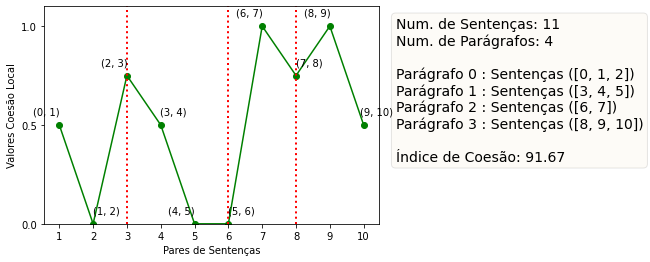

In [55]:
print(f"Total de sentenças: {len(td.sentences)}")
plot_coesao_local(td)

In [56]:
print('\n'.join([str(x) for x in list(enumerate(td.sentences))]))

(0, Embora as pessoas acreditem que a mulher só obteve seu papel nos últimos séculos, há registros de mulheres que se destacaram na antiguidade clássica, como é o caso da Cleópatra e Hatshepsut (rainhas do Egito), mulheres espartanas e mulheres romanas, apesar dessas não terem uma vida política ativa.)
(1, Houve progressos e retrocessos ao longo da história nesse âmbito.)
(2, No entanto,  no Brasil, o que se vê é que as mulheres foram tardiamente e gradativamente conquistando seus direitos.)
(3, A partir de 1827, a mulher brasileira passou a ter brandos direitos, como permissão de estudar, e em 1888 destaca-se a ‘pioneira’ em ‘questões diplomáticas’, Princesa Isabel, que assinou a Lei Áurea, a qual aboliu a escravidão.)
(4, Apesar de ela ter um papel fundamental na história do Brasil, demorou a outras mulheres se destacarem e, após muitas lutas, Bertha Luz, em 1922, cria a Federação Brasileira pelo Progresso Feminino, que foi o estopim para a conquista do voto feminino.)
(5, A partir d

In [57]:
def plot_coesao_global(td): 
    
    fig, ax = plt.subplots()    
    y = td.global_cohesion_values
    x = [a+1 for a in list(range(len(td.global_cohesion_values)))]
    plt.ylim(0.0, 1.1)
    plt.yticks(np.arange(0, 1.5, 0.5))
    plt.xticks(np.arange(0, len(td.global_cohesion_values)+1, 1.0))
    plt.xlabel("Pares de Parágrafos")
    plt.ylabel("Valores Coesão Global")
    plt.plot(x, y, 'go-')
    
    pares_paragraphs = list(combinations(list(range(len(td.paragraphs))),2))
    for i, p in enumerate(list(zip(x,y))):
        px, py = p
        ax.annotate(f"{pares_paragraphs[i]}", xy=(px,py),
                    textcoords="offset points", 
                     xytext=(3,-15),
                     ha='center')
        
    # Caixa com informações adicionais    
    text_valores = "\n".join([f"Índice de Coesão: {round(100*td.index_cohesion,2)}"])
    
    textstr = '\n'.join((r'Num. de Parágrafos: %d' % (len(td.paragraphs),),                         
                         "\n"+text_valores))    
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.1)    
    ax.text(1.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    
    # Linhas verticais de separação dos parágrafos
    l_interv = list(range(len(td.paragraphs)-1,0,-1))
    ids_p = [p.id for p in td.paragraphs]
    l_div = [sum(l_interv[0:x:1]) for x in range(0,len(l_interv))]
    xcoords = l_div[1:]    
    #xcoords[-1] = xcoords[-1]-1
    for xc in xcoords:
        plt.axvline(x=xc, color='yellow', ls=':', lw=2)

Total de parágrafos: 4


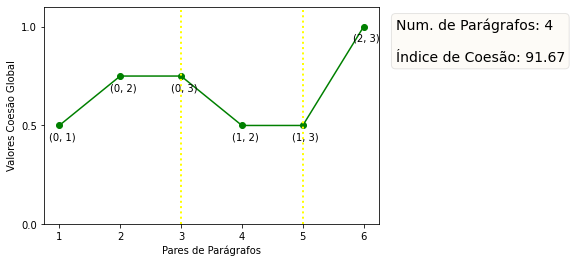

In [58]:
print(f"Total de parágrafos: {len(td.paragraphs)}")
plot_coesao_global(td)


In [59]:
from itertools import product, combinations

def get_ppair_values(td):
    l_id_p = [a for a in list(range(len(td.paragraphs)))]
    l_prods = [(a,b) for a,b in list(product(l_id_p,l_id_p)) if a != b]
    #print(f"l_prods: {str(l_prods)}")
    l_combs = list(combinations(l_id_p, 2))
    #print(f"l_combs: {str(l_combs)}")
    l_values = td.global_cohesion_values
    x = [a+1 for a in list(range(len(td.global_cohesion_values)))]
    #l_valores = list(zip(x,y))
    l_valores = list(zip(x,l_values))

    l_combs_values = []
    l_prod_values = []
    for i_pos, i_prod in enumerate(l_prods):
        if i_prod in l_combs:
            l_pos = l_combs.index(i_prod)
        else:
            a,b = i_prod
            l_pos = l_combs.index((b,a))

        l_prod_values.append((i_pos+1,l_values[l_pos]))

    return l_prods,l_prod_values


In [60]:
from itertools import zip_longest

def grouper(n, iterable, padvalue=None):
    "grouper(3, 'abcdefg', 'x') --> ('a','b','c'), ('d','e','f'), ('g','x','x')"
    return zip_longest(*[iter(iterable)]*n, fillvalue=padvalue)


In [61]:
from itertools import islice

def plot_coesao_global2(td): 
    
    l_prods, l_prod_values = get_ppair_values(td)
    
    fig, ax = plt.subplots()        
    l_x, l_y = list(zip(*l_prod_values))
    l_x = list(grouper(len(td.paragraphs)-1,l_x))
    l_y = list(grouper(len(td.paragraphs)-1,l_y))    
    l_notes = list(grouper(len(td.paragraphs)-1,l_prods))
    
    plt.ylim(0.0, 1.1)
    plt.yticks(np.arange(0, 1.5, 0.5))
    #plt.xticks(np.arange(0, len(l_prods)+1, 1.0))
    plt.xticks([])  
    #plt.xlabel("Pares de Parágrafos")
    plt.ylabel("Valores Coesão Global")
    
    xcoords = []
    for x,y,notes in zip(l_x, l_y, l_notes):        
        plt.plot(x, y, 'go-')           
                    
        for i, p in enumerate(list(zip(x,y))):
            px, py = p
            ax.annotate(f"{notes[i]}", xy=(px,py),
                        textcoords="offset points", 
                         xytext=(3,-15),
                         ha='center')
        xcoords.append(x[-1]+0.5)
    
    for xc in xcoords[:-1]:
        plt.axvline(x=xc, color='yellow', ls=':', lw=2)        
        
    for p_i, xc in enumerate(xcoords):
        plt.text(xc-2, -0.1, f"Parág. {p_i}")
        
    # Caixa com informações adicionais    
    text_valores = "\n".join([f"Índice de Coesão: {round(100*td.index_cohesion,2)}"])
    
    textstr = '\n'.join((r'Num. de Parágrafos: %d' % (len(td.paragraphs),),                         
                         "\n"+text_valores))    
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.1)    
    ax.text(1.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
      

Total de parágrafos: 4


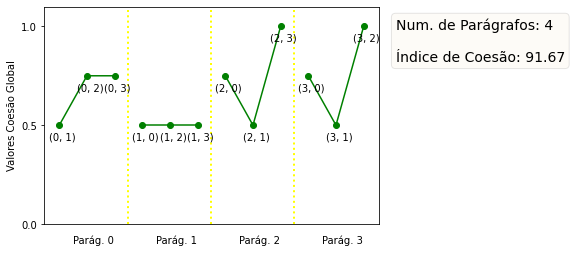

In [62]:
print(f"Total de parágrafos: {len(td.paragraphs)}")
plot_coesao_global2(td)

In [63]:
print('\n'.join([str(x) for x in list(enumerate(td.paragraphs))]))

(0, Embora as pessoas acreditem que a mulher só obteve seu papel nos últimos séculos, há registros de mulheres que se destacaram na antiguidade clássica, como é o caso da Cleópatra e Hatshepsut (rainhas do Egito), mulheres espartanas e mulheres romanas, apesar dessas não terem uma vida política ativa. Houve progressos e retrocessos ao longo da história nesse âmbito. No entanto,  no Brasil, o que se vê é que as mulheres foram tardiamente e gradativamente conquistando seus direitos.)
(1, A partir de 1827, a mulher brasileira passou a ter brandos direitos, como permissão de estudar, e em 1888 destaca-se a ‘pioneira’ em ‘questões diplomáticas’, Princesa Isabel, que assinou a Lei Áurea, a qual aboliu a escravidão. Apesar de ela ter um papel fundamental na história do Brasil, demorou a outras mulheres se destacarem e, após muitas lutas, Bertha Luz, em 1922, cria a Federação Brasileira pelo Progresso Feminino, que foi o estopim para a conquista do voto feminino. A partir daí, a mulher começou


Listando:    
<ol>
    <li>Foco Explícito (FE)</li>
    <li>Lista intermediária do FE</li>    
    <li>Lista das Entidades Nomeadas</li>
    <li>Menções da DBPedia</li>
</ol>

In [64]:
for i, sent in enumerate(td.sentences):
    print()
    print("ID: ", str(i))    
    print("Texto Original: ", sent.text)    
    print()    
    print("Lista de Foco Explícito: ", [s for s in sent.list_fe])    
    print()
    print("Lista Intermediária de FE: ", sent.list_fe_li)#[s for s in sent.list_fe_li])    
    print()    
    print("Lista de Entidades Nomeadas: ", sent.named_entities)    
    print()
    print("Lista de Menções DBPedia: ", str(sent.dbpedia_mentions))    
    
    print("-"*100)
    
#s_disp = td.nlp_processor(td.sentences[4].text)
#spacy.displacy.render(s_disp, style="dep", options = {"compact": True})    


ID:  0
Texto Original:  Embora as pessoas acreditem que a mulher só obteve seu papel nos últimos séculos, há registros de mulheres que se destacaram na antiguidade clássica, como é o caso da Cleópatra e Hatshepsut (rainhas do Egito), mulheres espartanas e mulheres romanas, apesar dessas não terem uma vida política ativa.

Lista de Foco Explícito:  ['rainhas', 'Egito', 'antiguidade clássica', 'séculos', 'se', 'pessoas', 'caso', 'vida', 'registros', 'Cleópatra', 'Hatshepsut', 'papel', 'mulheres', 'dessas', 'que']

Lista Intermediária de FE:  {'caso': {'ocorrência', 'evento', 'conto', 'acontecimento', 'aventura', 'estória', 'envolvimento', 'episódio', 'namoro', 'romance', 'fato'}, 'vida': {'sal', 'brilho', 'expressão', 'alma', 'existência', 'animação', 'subsistência', 'viveza', 'dias', 'biografia', 'tudo', 'sangue', 'vivacidade', 'viver', 'colorido', 'vivência'}, 'papel': {'função', 'finalidade'}, 'que': {'quão'}}

Lista de Entidades Nomeadas:  [Cleópatra, Hatshepsut, Egito]

Lista de Me

In [65]:
ERROS_EXCLUIR = ['punctuation:BEFORE_SENTENCES',
                'punctuation:EXTRA_PUNCTUATION',
                'repetition:DUPLICATED_TOKEN',
                'space:EXTRA_AFTER_LEFT_PUNCT',
                'space:EXTRA_BEFORE_RIGHT_PUNCT',
                'space:EXTRA_BETWEEN_WORDS',
                'space:MISSING_SPACE_AFTER_PUNCT'
                ]

In [66]:
def formata_erro(s,m):
    return f"{s}           & {m}  \\\\ \n \\hline"

def get_num(s):
    return s

l_erros = list(set([(erro.rule_id, erro.short_msg) 
                for x in df_redacao['Erros'] 
                  for erro in x if erro.rule_id not in ERROS_EXCLUIR]))
l_erros

[('xml:129', 'Verificou-se erro de concordância entre o sujeito e o verbo.'),
 ('xml:73', '"só, ou, ora e quer" atraem o pronome para antes do verbo.'),
 ('probs:paronyms', 'Possível confusão entre acumulo e acúmulo.'),
 ('xml:88', '"Eu" não deve ser preposicionado. Use "a mim".'),
 ('xml:115', 'Os numerais concordam com o substantivo a que se referem.'),
 ('probs:paronyms', 'Possível confusão entre habito e hábito.'),
 ('xml:79',
  '"Aderir" constrói-se com prep. "a". Há crase com compl. feminino.'),
 ('xml:52', 'Use "eu" ao invés de "mim" como sujeito de verbo no infinitivo.'),
 ('probs:paronyms', 'Possível confusão entre duvida e dúvida.'),
 ('xml:122', '"Atrás" é redundante, devido ao uso do verbo "haver".'),
 ('xml:10', '"Em relação" rege a preposição "a", logo há crase aqui.'),
 ('xml:95', 'Os artigos concordam com o substantivo a que se referem.'),
 ('probs:paronyms', 'Possível confusão entre divida e dívida.'),
 ('xml:86', '"(Des)obedecer" constrói-se com preposição "a".'),
 ('

In [67]:
l_erro_xml = [x for x in l_erros if "xml:" in x[0]]
l_erro_xml = sorted(l_erro_xml, key=lambda x:int(x[0].split(":")[1]))
l_erro_xml 

[('xml:1', 'Não ocorre crase antes de palavras masculinas.'),
 ('xml:2', 'Não ocorre crase antes de palavras masculinas.'),
 ('xml:3', 'Não há crase neste caso, somente no plural ("às").'),
 ('xml:4', 'Não acontece crase antes de verbo.'),
 ('xml:5', 'Ocorre crase em expressões indicativas de horas.'),
 ('xml:6', 'Ocorre crase em expressões indicativas de horas.'),
 ('xml:9', '"Em relação" rege a preposição "a", logo há crase aqui.'),
 ('xml:10', '"Em relação" rege a preposição "a", logo há crase aqui.'),
 ('xml:11', '"Com relação" rege a preposição "a", logo há crase aqui.'),
 ('xml:12', '"Com relação" rege a preposição "a", logo há crase aqui.'),
 ('xml:13', '"Devido" rege a preposição "a", logo há crase aqui.'),
 ('xml:14', '"Devido" rege a preposição "a", logo há crase aqui.'),
 ('xml:17', 'O adjetivo concorda com o substantivo a que se refere.'),
 ('xml:21', 'O adjetivo concorda com o substantivo a que se refere.'),
 ('xml:39',
  'A palavra "meio" usada no sentido de "um pouco" (a

In [68]:
l_erro_outros = sorted([x for x in l_erros if "xml:" not in x[0]], key=lambda x:x[0])
l_erro_outros


[('government:GOVERNMENT', 'Regência verbal.'),
 ('probs:paronyms', 'Possível confusão entre acumulo e acúmulo.'),
 ('probs:paronyms', 'Possível confusão entre habito e hábito.'),
 ('probs:paronyms', 'Possível confusão entre duvida e dúvida.'),
 ('probs:paronyms', 'Possível confusão entre divida e dívida.'),
 ('probs:paronyms', 'Possível confusão entre influencia e influência.'),
 ('probs:paronyms', 'Possível confusão entre publico e público.'),
 ('probs:paronyms', 'Possível confusão entre influência e influencia.'),
 ('probs:paronyms', 'Possível confusão entre diagnostico e diagnóstico.'),
 ('probs:paronyms', 'Possível confusão entre exercito e exército.'),
 ('probs:paronyms', 'Possível confusão entre bebê e bebe.'),
 ('probs:paronyms', 'Possível confusão entre critico e crítico.'),
 ('probs:paronyms', 'Possível confusão entre Porem e Porém.'),
 ('probs:paronyms', 'Possível confusão entre porem e porém.')]

In [69]:
p_erros = [formata_erro(*x) for x in l_erro_xml]
print("\n".join(p_erros))    

xml:1           & Não ocorre crase antes de palavras masculinas.  \\ 
 \hline
xml:2           & Não ocorre crase antes de palavras masculinas.  \\ 
 \hline
xml:3           & Não há crase neste caso, somente no plural ("às").  \\ 
 \hline
xml:4           & Não acontece crase antes de verbo.  \\ 
 \hline
xml:5           & Ocorre crase em expressões indicativas de horas.  \\ 
 \hline
xml:6           & Ocorre crase em expressões indicativas de horas.  \\ 
 \hline
xml:9           & "Em relação" rege a preposição "a", logo há crase aqui.  \\ 
 \hline
xml:10           & "Em relação" rege a preposição "a", logo há crase aqui.  \\ 
 \hline
xml:11           & "Com relação" rege a preposição "a", logo há crase aqui.  \\ 
 \hline
xml:12           & "Com relação" rege a preposição "a", logo há crase aqui.  \\ 
 \hline
xml:13           & "Devido" rege a preposição "a", logo há crase aqui.  \\ 
 \hline
xml:14           & "Devido" rege a preposição "a", logo há crase aqui.  \\ 
 \hline
xml:17         

In [70]:
p_erros = [formata_erro(*x) for x in l_erro_outros]
print("\n".join(p_erros))   

government:GOVERNMENT           & Regência verbal.  \\ 
 \hline
probs:paronyms           & Possível confusão entre acumulo e acúmulo.  \\ 
 \hline
probs:paronyms           & Possível confusão entre habito e hábito.  \\ 
 \hline
probs:paronyms           & Possível confusão entre duvida e dúvida.  \\ 
 \hline
probs:paronyms           & Possível confusão entre divida e dívida.  \\ 
 \hline
probs:paronyms           & Possível confusão entre influencia e influência.  \\ 
 \hline
probs:paronyms           & Possível confusão entre publico e público.  \\ 
 \hline
probs:paronyms           & Possível confusão entre influência e influencia.  \\ 
 \hline
probs:paronyms           & Possível confusão entre diagnostico e diagnóstico.  \\ 
 \hline
probs:paronyms           & Possível confusão entre exercito e exército.  \\ 
 \hline
probs:paronyms           & Possível confusão entre bebê e bebe.  \\ 
 \hline
probs:paronyms           & Possível confusão entre critico e crítico.  \\ 
 \hline
probs:paronym

In [71]:
print("\n".join([str((i,x)) for i,x in enumerate(df_redacao['Cadeias'][:100])]))

(0, OrderedDict([('Cadeia_1', OrderedDict([('sn', [OrderedDict([('@id', '2'), ('@tokens', '4...5'), ('@nucleo', 'anúncios'), ('@sintagma', 'anúncios publicitários'), ('@Categoria', 'OUTRO'), ('@sentenca', '1'), ('word_4', OrderedDict([('@token', 'anúncios'), ('@lemma', 'anúncio'), ('@pos', 'n'), ('@features', 'M=P')])), ('word_5', OrderedDict([('@token', 'publicitários'), ('@lemma', 'publicitário'), ('@pos', 'adj'), ('@features', 'M=P')]))]), OrderedDict([('@id', '5'), ('@tokens', '13...13'), ('@nucleo', 'informação'), ('@sintagma', 'informação'), ('@Categoria', 'OUTRO'), ('@sentenca', '1'), ('word_13', OrderedDict([('@token', 'informação'), ('@lemma', 'informação, informar'), ('@pos', 'n'), ('@features', 'F=S')]))]), OrderedDict([('@id', '26'), ('@tokens', '92...92'), ('@nucleo', 'comunicação'), ('@sintagma', 'comunicação'), ('@Categoria', 'OUTRO'), ('@sentenca', '2'), ('word_92', OrderedDict([('@token', 'comunicação'), ('@lemma', 'comunicação, comunicar'), ('@pos', 'n'), ('@features'

In [72]:
cadeias_0 = df_redacao['Cadeias'][0]
for sn in cadeias_0['Cadeia_1']['sn']:
    print(sn['@sentenca'],sn['@sintagma'])

1 anúncios publicitários
1 informação
2 comunicação
4 a informação
5 análise
5 informação


In [73]:
cadeias_0.values()

odict_values([OrderedDict([('sn', [OrderedDict([('@id', '2'), ('@tokens', '4...5'), ('@nucleo', 'anúncios'), ('@sintagma', 'anúncios publicitários'), ('@Categoria', 'OUTRO'), ('@sentenca', '1'), ('word_4', OrderedDict([('@token', 'anúncios'), ('@lemma', 'anúncio'), ('@pos', 'n'), ('@features', 'M=P')])), ('word_5', OrderedDict([('@token', 'publicitários'), ('@lemma', 'publicitário'), ('@pos', 'adj'), ('@features', 'M=P')]))]), OrderedDict([('@id', '5'), ('@tokens', '13...13'), ('@nucleo', 'informação'), ('@sintagma', 'informação'), ('@Categoria', 'OUTRO'), ('@sentenca', '1'), ('word_13', OrderedDict([('@token', 'informação'), ('@lemma', 'informação, informar'), ('@pos', 'n'), ('@features', 'F=S')]))]), OrderedDict([('@id', '26'), ('@tokens', '92...92'), ('@nucleo', 'comunicação'), ('@sintagma', 'comunicação'), ('@Categoria', 'OUTRO'), ('@sentenca', '2'), ('word_92', OrderedDict([('@token', 'comunicação'), ('@lemma', 'comunicação, comunicar'), ('@pos', 'n'), ('@features', 'F=S')]))]), O

In [77]:
# Exibe cadeias de correferência
print(f"\n========= REDACAO {num_redacao} ==========\n")
for cadeia in cadeias.values():
    for sn in cadeia['sn']:
        print("\t",int(sn['@sentenca'])-1,sn['@sintagma'])
    print("\n=============================\n")



========= REDACAO 1915 ==========

	 0 as pessoas
	 0 a mulher
	 5 a mulher
	 6 homem
	 7 os homens
	 8 os homens
	 9 homens


	 0 mulheres
	 2 as mulheres
	 6 mulheres
	 7 as mulheres
	 7 mulheres
	 8 as mulheres
	 9 as mulheres


	 0 o caso de a Cleópatra e Hatshepsut ( rainhas de o Egito ) , mulheres espartanas e mulheres romanas , apesar dessas essas
	 1 a história
	 4 a história


	 0 Hatshepsut
	 0  rainhas de o Egito 


	 2 o Brasil
	 4 o Brasil


	 4 ela
	 4 um papel fundamental


	 6 século XXI preconceitos machistas
	 7 maioria


	 8 certeza
	 10 certeza


	 8 Pesquisas Educacionais
	 8 Inep




In [75]:
#print(texto)
print('\n'.join([str(x) for x in list(enumerate(td.sentences))]))


(0, Embora as pessoas acreditem que a mulher só obteve seu papel nos últimos séculos, há registros de mulheres que se destacaram na antiguidade clássica, como é o caso da Cleópatra e Hatshepsut (rainhas do Egito), mulheres espartanas e mulheres romanas, apesar dessas não terem uma vida política ativa.)
(1, Houve progressos e retrocessos ao longo da história nesse âmbito.)
(2, No entanto,  no Brasil, o que se vê é que as mulheres foram tardiamente e gradativamente conquistando seus direitos.)
(3, A partir de 1827, a mulher brasileira passou a ter brandos direitos, como permissão de estudar, e em 1888 destaca-se a ‘pioneira’ em ‘questões diplomáticas’, Princesa Isabel, que assinou a Lei Áurea, a qual aboliu a escravidão.)
(4, Apesar de ela ter um papel fundamental na história do Brasil, demorou a outras mulheres se destacarem e, após muitas lutas, Bertha Luz, em 1922, cria a Federação Brasileira pelo Progresso Feminino, que foi o estopim para a conquista do voto feminino.)
(5, A partir d

In [76]:
#print("\n".join([str((i,x)) for i,x in enumerate(cadeias_0)]))


for i,cadeias_texto in enumerate(df_redacao['Cadeias']):
    print(f"\n========= REDACAO {i} ==========\n")
    for cadeia in cadeias_texto.values():
        for sn in cadeia['sn']:
            print("\t",sn['@sentenca'],sn['@sintagma'])
        print("\n=============================\n")
    if i > 5:
        break


========= REDACAO 0 ==========

	 1 anúncios publicitários
	 1 informação
	 2 comunicação
	 4 a informação
	 5 análise
	 5 informação


	 1 a televisão
	 3 a TV
	 4 a TV
	 4 resultado de um país com educação precária e cidadãos ineficientes
	 4 a TV
	 5 a TV
	 5 a televisão
	 5 o passo
	 6 os benefícios
	 6 a televisão
	 6 melhorias


	 1 um grande número
	 1 pessoas
	 3 as pessoas
	 6 qualidade


	 1 diversas maneiras
	 4 modo
	 5 a moeda
	 5 meio


	 4 o senso comum
	 5 O senso comum
	 6 o senso comum


	 4 um país
	 5 a nação


	 4 educação precária
	 6 uma educação



========= REDACAO 1 ==========

	 1 um crime
	 3 o crime
	 4 uma culpa -
	 4 o momento
	 6 o criminoso
	 11 crime


	 1 os motivos
	 1 o indivíduo
	 10 um fim
	 13 a morte


	 1 barbaridade
	 10 barbáries


	 2 o bullying
	 9 bullying


	 3 o principal questionamento
	 11 o tratamento


	 3 as raízes de o crime
	 3 a escola
	 4 As famílias
	 4 esse triste
	 7 a escola
	 12 sistemas


	 3 a segurança
	 4 segurança
	 8